# Week 3 Tutorial - Handling DNA sequences and plotting 

In this week, we will cover the following topics:

* Python Modules
    * What is a Python module?
    * What is a Python library?
    * How to use a Python module?
* Python Classes and Objects
    * Python classes
    * Python objects 
* Introduction to Biopython
    * What is Biopython?
    * Download the coding sequences of Arabidopsis
    * Build a DNA sequence object 
    * Translate the DNA sequence to protein sequence 
    * Calculate the isoelectric point of our protein sequence
* Plotting with seaborn
    * Introduction to seaborn 
    * Plot a histogram of the isoelectric points data and look at the distribution 

## Python Modules

### What is a Python module?

In Python, a module is a file containing Python code that can be imported and used in other Python code. A module can define functions, classes, and variables that can be used in other programs. Modules provide a way to organise code into separate files, making it easier to manage and reuse code across multiple programs. 

Python comes with a large number of built-in modules that provide a wide range of functionality, such as file I/O, networking, math operations, and more. You can also create your own modules by writing Python code in a file with a `.py` extension and importing it into your other Python programs. 

### What is a Python library?

A library is a collection of pre-written code that can be imported and used in a Python program. A library typically contains a set of functions, classes, or modules that provide specific functionality. 

### How to use a Python module?

If we are using a built-in Python module, we can load the module by use the `import` command with the module name. If we are using an external Python module, we have to download the module first and then use `import` to load. 

A module can provide a range of functions and constants, we need to put the function name after the module name with a dot to call the function. 

Here's an example of importing a built-in module in Python:

In [ ]:
import math

print("Pi is", math.pi)

x = math.sin(2*math.pi)
print("The sine value of 2*pi is", x)

y = math.sqrt(2) 
print("The square root value of 2 is", y)

In this example, we used the `import` command to load the "math" module. `math.pi` means to call the "pi" value that stored in the module "math".

Then we also used `math.sin` to calculate the sine value of `2*pi` and `math.sqrt` to calculate the square root of 2.

__We can also import specific functions or variables from a module.__

In this way, we can only use the function name to call the function, we don't need to put the module name before. 

Here's an example:

In [ ]:
from math import sin, pi

print("Pi is", pi)

x = sin(2 * pi)
print("The sine value of 2*Pi is", x)

__We can also give a module a different name.__

Some modules can have really long names and it can be difficult for us to type every time. So, it is easier if we make the module name short. 

Here's an example about how to do so:

In [ ]:
import math as m

print("Pi is", m.pi)
print("The sine value of 2*Pi is", m.sin(2 * m.pi))

__We can also import a specific function or variable from a module and give it a different name.__

For example:

In [ ]:
from math import sin as s 
from math import pi 

print("Pi is", pi)
print("The sine value of 2*Pi is", s(2*pi))

## Python Classes and Objects

### What is a Python class?

A class is a template for creating objects. A class defines a set of attributes and methods that are shared by all instances (objects) of that class. Attributes are variables that store data, while methods are functions that operate on that data. 

In Python, all data types are implemented as classes. Therefore, strings, integers, and lists etc. are implemented as classes, they all have their own attributes and methods. Classes provide a powerful and flexible way to organise and encapsulate data and behaviour in Python, making it easier to write reusable and maintainable code. 

### What is a Python object?

A Python object is an instance of a class. When you create an object in Python, you are creating an instance of a class, which means that the object inherits all the attributes and methods defined in that class.

You may be still confused at this stage, we will use a few examples to explain more in detail. 

### Defining a class

Here's an example of defining a simple class:

In [ ]:
class Car:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
        
    def start(self):
        print("Starting my", self.make)
        
    def stop(self):
        print("Stopping my", self.make)
        
    def drive(self):
        print("Driving my", self.make, self.model, self.year)

In this class, our class name is Car, and we can use `Car()` to create an instance of this class. We have 3 attributes which stored 3 different data of our car, they are "make", "model", and "year". And our class has 3 methods which can operate on that data. Let's try create an object of the class and use its attributes and methods. 

In [ ]:
# create a new Car object
my_car = Car("Tesla", "Model Y", 2022)

In [ ]:
# access the attributes in my_car
my_car.make

In [ ]:
# access the model and year attributes in my_car

In [ ]:
# call the methods of the car object 
my_car.start()

In [ ]:
# call the drive and stop methods of my_car object 

In the above example, our class only has 3 attributes and 3 methods. What if we have a complicated class and forget all the names for calling the attributes and methods? Don't worry, there is a built-in function in Python for us to inspect all the attributes and methods of an object. 

__`dir()` function:__

`dir()` is a built-in function that returns a list of all the attributes and methods of an object.

In [ ]:
dir(my_car)

As we mentioned before, all data types are implemented as classes. So, we can also use `dir()` to inspect the built-in data types' attributes and methods. 

In [ ]:
dir(int)

In [ ]:
# try look at the attributes and methods of another data type 

## Downloading the sequence data 

We are using the public released coding sequences of Arabidopsis. You can find the data [here](https://www.arabidopsis.org/download/index-auto.jsp?dir=%2Fdownload_files%2FGenes%2FAraport11_genome_release%2FAraport11_blastsets).

__Using Linux command-line in Jupyter Notebook.__

In Jupyter Notebook, we can run Linux command-line programs using the `!` character at the beginning of a cell. This character tells Jupyter Notebook to treat the cell contents as a shell command, rather than Python code. Here, we will use the Linux command-line to download the data. 

__Downloading data from the web.__

In Linux, we use the `wget` command to download files from the web, it can download files from HTTP, HTTPS, and FTP servers. 

Run the following cell to download our data:

In [ ]:
!wget https://www.arabidopsis.org/download_files/Genes/Araport11_genome_release/Araport11_blastsets/Araport11_cds_20220914.gz

Run the following cell to decompress the file:

In [ ]:
!gunzip Araport11_cds_20220914.gz

Run the following cell to rename our CDS file to have a file extension, so we can know it is a FASTA file:

In [ ]:
!mv Araport11_cds_20220914 Araport11_cds_20220914.fa

Run the following cell to take a look of the CDS file:

In [7]:
!head -n 50 Araport11_cds_20220914.fa

>AT1G01010.1 | Symbols: NAC001, NTL10, ANAC001 | NAC domain containing protein 1 | chr1:3760-5630 FORWARD LENGTH=1290
ATGGAGGATCAAGTTGGGTTTGGGTTCCGTCCGAACGACGAGGAGCTCGTTGGTCACTATCTCCGTAACAAAATCGAAGG
AAACACTAGCCGCGACGTTGAAGTAGCCATCAGCGAGGTCAACATCTGTAGCTACGATCCTTGGAACTTGCGCTTCCAGT
CAAAGTACAAATCGAGAGATGCTATGTGGTACTTCTTCTCTCGTAGAGAAAACAACAAAGGGAATCGACAGAGCAGGACA
ACGGTTTCTGGTAAATGGAAGCTTACCGGAGAATCTGTTGAGGTCAAGGACCAGTGGGGATTTTGTAGTGAGGGCTTTCG
TGGTAAGATTGGTCATAAAAGGGTTTTGGTGTTCCTCGATGGAAGATACCCTGACAAAACCAAATCTGATTGGGTTATCC
ACGAGTTCCACTACGACCTCTTACCAGAACATCAGAGGACATATGTCATCTGCAGACTTGAGTACAAGGGTGATGATGCG
GACATTCTATCTGCTTATGCAATAGATCCCACTCCCGCTTTTGTCCCCAATATGACTAGTAGTGCAGGTTCTGTGGTCAA
CCAATCACGTCAACGAAATTCAGGATCTTACAACACTTACTCTGAGTATGATTCAGCAAATCATGGCCAGCAGTTTAATG
AAAACTCTAACATTATGCAGCAGCAACCACTTCAAGGATCATTCAACCCTCTCCTTGAGTATGATTTTGCAAATCACGGC
GGTCAGTGGCTGAGTGACTATATCGACCTGCAACAGCAAGTTCCTTACTTGGCACCTTATGAAAATGAGTCGGAGATGAT
TTGGAAGCATGTGATTGAAGAAAATTTTGAGTTTTTGGTAGATGAAAGGACATCTATGCAACAGCATTACAG

To calculate how many coding sequences we have in the file:

In [10]:
!cat Araport11_cds_20220914.fa | grep "^>" | wc -l

48266


__What is a FASTA file?__

A FASTA file is a text file format used for representing nucleotide or protein sequences. It is named after the FASTA software package that was one of the first tools for aligning and comparing DNA sequences. 

A typical FASTA file consists of one or more sequences, each preceded by a header line that begins with a `>` character. The header line contains a description of the sequence, which can include the sequence name, gene name, organism, and other relevant information. 

The sequence itself follows the header line and consists of a series of letters representing the nucleotide or amino acids that make up the sequence. The letters can be in upper or lowercase and may include spaces, dashes, or other characters to represent gaps or other features of the sequence. 

FASTA files are widely used in bioinformatics for storing and sharing sequence data, and are compatible with many different software tools and databases.

## Introduction to [Biopython](https://biopython.org/)

### What is Biopython?

Biopython is a Python library that provides tools and modules for working with biological data, such as DNA, RNA, and protein sequences. It allows researchers to perform a wide range of tasks, such as sequence alignment, data parsing and conversion, statistical analysis, and more. Biopython is widely used in many areas of biological research, including genomics, proteomics, bioinformatics, and computational biology.

In today's class, we will use the coding sequences of Arabidopsis as our DNA sequence data to perform some basic applications of Biopython. 

### The `Seq` class:

In Biopython, sequences are usually held as `Seq` objects, which add various biological methods on top of string like behaviour. To create a `Seq` object, we can use the `Seq()` function from the Seq module of package Biopython.

In [17]:
from Bio.Seq import Seq

DNAseq = Seq("atgtataacattggccataccccgtatacccatgcgaaccatattggccattaa")
DNAseq 

Seq('atgtataacattggccataccccgtatacccatgcgaaccatattggccattaa')

To get the actual sequence rather than the `Seq` object, we can simply print the object:

In [18]:
print(DNAseq)

atgtataacattggccataccccgtatacccatgcgaaccatattggccattaa


In [31]:
# Check the attributes and methods of object DNAseq 
dir(DNAseq)

['__abstractmethods__',
 '__add__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_data',
 'back_transcribe',
 'complement',
 'complement_rna',
 'count',
 'count_overlap',
 'encode',
 'endswith',
 'find',
 'index',
 'join',
 'lower',
 'lstrip',
 'replace',
 'reverse_complement',
 'reverse_complement_rna',
 'rfind',
 'rindex',
 'rsplit',
 'rstrip',
 'split',
 'startswith',
 'strip',
 'tomutable',
 'transcribe',
 'translate',
 'ungap',
 'upper']

From the above result we can see that there are a few methods we've programmed before, such as translate, transcribe, and complement. Now, let's try use these methods of the `Seq` object.

__To find the start codon of `DNAseq`:__

In [43]:
DNAseq.find("atg")

0

Exercise: build a `Seq` object for sequence AGGTCTGGTATGTTTCCGTTTCCAGTGACACACTG and name it `seq_1`, and find the start codon of sequence.

__To count the number of nucleotides of `DNAseq`:__

In [35]:
DNAseq.count("a")

17

Exercise: find the numbers of the other 3 nucleotides.

__To count the number of a specific sequences:__

In [37]:
DNAseq.count("aa") # the count is non-overlapping 

3

Exercise: count the number of "cc" and "tt" in `DNAseq`.

__To complement and reverse complement of a sequence:__

In [41]:
DNAseq.complement()

Seq('tacatattgtaaccggtatggggcatatgggtacgcttggtataaccggtaatt')

In [42]:
DNAseq.reverse_complement()

Seq('ttaatggccaatatggttcgcatgggtatacggggtatggccaatgttatacat')

Exercise: complement and reverse complement sequence `seq_1`.

Exercise: transcribe and translate `DNAseq` and `seq_1`.

__Question: how many attributes does the `Seq` class have?__

### The `SeqRecord` class:

`SeqRecord` can store a sequence with its identifiers (ID and name), description, optionally annotation, and sub-features. One `SeqRecord` object can store one sequence and its related information. To create a `SeqRecord` object, we can use the `SeqRecord` function from the SeqRecord module of the Biopython package. For example:

In [48]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

record = SeqRecord(
    Seq("MKQHKAMIVALIVICITAVVAALVTRKDLCEVHIRTGQTEVAVF"),
    id="YP_025292.1",
    name="HokC",
    description="toxic membrane protein, small",
)

print(record)

ID: YP_025292.1
Name: HokC
Description: toxic membrane protein, small
Number of features: 0
Seq('MKQHKAMIVALIVICITAVVAALVTRKDLCEVHIRTGQTEVAVF')


__Exercise: get the sequence, id, and name from the SeqRecord object `record`.__

### Load sequence data into Python from file 

Here we need to use one function called `parse()` from the SeqIO module of Biopython, it can read many file formats such as FASTA, Fastq, GenBank etc. 

In [2]:
from Bio import SeqIO

`SeqIO.parse()` function can turn a sequence file into an iterator returning SeqRecords. To load a sequence data file, we can simply write a for loop with `SeqIO.parse("filename", "file_format")`, for example:

In [3]:
filename = "Araport11_cds_20220914.fa"
arabidopsis_cds = []

for seq in SeqIO.parse(filename, 'fasta'):
    arabidopsis_cds.append(seq)

In each iteration, `SeqIO.parse()` converts a sequence in FASTA file into a `SeqRecord` object, and then we use `append()` to add the `SeqRecord` object into our list. Let's print out the first item in the list `arabidopsis_cds` to see what does it look like:

In [8]:
print(arabidopsis_cds[0])

ID: AT1G01010.1
Name: AT1G01010.1
Description: AT1G01010.1 | Symbols: NAC001, NTL10, ANAC001 | NAC domain containing protein 1 | chr1:3760-5630 FORWARD LENGTH=1290
Number of features: 0
Seq('ATGGAGGATCAAGTTGGGTTTGGGTTCCGTCCGAACGACGAGGAGCTCGTTGGT...TAA')


It is a SeqRecord object, and it should be the first sequence in the FASTA file as well. 

Now, let's check how many CDS we have:

In [9]:
len(arabidopsis_cds)

48266

The result should be the same as the one we used command line to get. 

Let's try to access the information stored in the list `arabidopsis_cds`.

__What's the sequence and length of the second CDS?__

In [21]:
print(arabidopsis_cds[1].seq)
print("The length of the second CDS is ", len(arabidopsis_cds[1].seq), ".", sep="")

ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAAAGTCATTGTTCATTCAATACTCTCCGGGTAACATTCGTCTCATGAAATGCGGAAATTGCAAGGAAGTAGCAGATGAGTACATCGAGTGTGAACGCATGATTATTTTCATCGATTTAATCCTTCACAGACCAAAGGTATATAGACACGTCCTCTACAATGCAATTAATCCAGCAACTGTCAATATTCAGCATCTGTTGTGGAAGTTGGTCTTCGCCTATCTTCTTCTAGACTGTTATAGAAGCTTGCTACTGAGAAAAAGTGATGAAGAATCGAGCTTTTCTGATAGCCCTGTTCTTCTATCTATAAAGGTTCTGATTGGTGTCTTATCTGCAAACGCTGCATTTATCATCTCTTTTGCCATTGCGACTAAGGGTTTGCTAAATGAAGTTTCCAGAAGAAGAGAGATTATGTTGGGGATATTCATCTCTAGTTACTTCAAGATATTTCTGCTTGCGATGTTGGTATGGGAATTCCCAATGTCAGTGATTTTTTTTGTCGATATACTTCTCTTAACATCAAACTCCATGGCTCTTAAAGTGATGACTGAATCAACAATGACCAGATGCATAGCCGTATGCTTAATCGCGCACTTGATTAGATTCTTGGTGGGTCAGATTTTTGAGCCGACAATATTTTTGATACAAATTGGATCTCTGTTGCAATATATGTCTTATTTTTTCAGAATCGTATGA
The length of the second CDS is 738.


__Exercise: build a dictionary of CDS ID and its length.__

The purpose of this exercise is to find the longest CDS. 

In [4]:
cds_length_dict = {}

for seq in arabidopsis_cds:
    cds_length_dict[seq.id] = len(seq.seq)

Before we go to the next step, we need to learn the attributes and methods of data type dictionary.

__Attributes and methods of dictionary:__

We have learned dictionary previously but we didn't mention the attributes and methods of dictionary. There are 3 very useful methods which return objects of all the keys, values, and key-value pairs of the dictionary.

In [15]:
# return an object of all the keys 
cds_length_dict.keys()

dict_keys(['AT1G01010.1', 'AT1G01020.1', 'AT1G01020.2', 'AT1G01020.3', 'AT1G01020.4', 'AT1G01020.5', 'AT1G01020.6', 'AT1G01030.1', 'AT1G01030.2', 'AT1G01040.1', 'AT1G01040.2', 'AT1G01050.1', 'AT1G01050.2', 'AT1G01060.1', 'AT1G01060.2', 'AT1G01060.3', 'AT1G01060.4', 'AT1G01060.5', 'AT1G01060.6', 'AT1G01060.7', 'AT1G01060.8', 'AT1G01070.1', 'AT1G01070.2', 'AT1G01080.1', 'AT1G01080.2', 'AT1G01080.3', 'AT1G01090.1', 'AT1G01100.1', 'AT1G01100.2', 'AT1G01100.3', 'AT1G01100.4', 'AT1G01110.1', 'AT1G01110.2', 'AT1G01120.1', 'AT1G01130.1', 'AT1G01140.1', 'AT1G01140.2', 'AT1G01140.3', 'AT1G01150.1', 'AT1G01150.2', 'AT1G01150.3', 'AT1G01160.1', 'AT1G01160.2', 'AT1G01170.1', 'AT1G01170.2', 'AT1G01180.1', 'AT1G01190.1', 'AT1G01190.2', 'AT1G01200.1', 'AT1G01210.1', 'AT1G01210.2', 'AT1G01210.3', 'AT1G01220.1', 'AT1G01220.2', 'AT1G01220.3', 'AT1G01220.4', 'AT1G01220.5', 'AT1G01220.6', 'AT1G01220.7', 'AT1G01220.8', 'AT1G01225.1', 'AT1G01230.1', 'AT1G01240.1', 'AT1G01240.2', 'AT1G01240.3', 'AT1G01240.4',

In [9]:
# return an object of all the values
cds_length_dict.values()

dict_values([1290, 738, 576, 711, 711, 597, 315, 1077, 1008, 5730, 5733, 639, 639, 1938, 1938, 1938, 1935, 1932, 1932, 1938, 1938, 1098, 957, 882, 885, 861, 1287, 339, 339, 291, 339, 1095, 1584, 1587, 375, 1344, 1350, 1356, 1038, 930, 879, 588, 690, 252, 252, 924, 1608, 1623, 714, 321, 321, 321, 3168, 2601, 2871, 2847, 2601, 2601, 3168, 2871, 783, 474, 996, 996, 996, 996, 996, 579, 1773, 1773, 1773, 1533, 813, 813, 1458, 426, 726, 5394, 5364, 5370, 123, 2121, 2136, 1032, 687, 447, 675, 564, 537, 537, 537, 537, 252, 183, 195, 1443, 1494, 615, 1086, 1446, 1455, 1371, 1995, 1413, 804, 870, 1284, 456, 1491, 1173, 534, 534, 435, 615, 984, 1911, 864, 777, 864, 777, 612, 744, 1161, 1419, 1050, 1050, 828, 1110, 1041, 828, 1437, 1530, 2178, 2412, 2115, 1665, 1512, 861, 645, 768, 624, 561, 1623, 1197, 1197, 1197, 1707, 1710, 1098, 1098, 846, 927, 1356, 1353, 1353, 1302, 1458, 1119, 1386, 1548, 1119, 1284, 420, 420, 870, 189, 675, 1452, 1452, 1218, 1218, 1428, 423, 438, 1263, 1260, 1302, 1263, 18

In [11]:
# return an object of all the key-value pairs 
cds_length_dict.items()

dict_items([('AT1G01010.1', 1290), ('AT1G01020.1', 738), ('AT1G01020.2', 576), ('AT1G01020.3', 711), ('AT1G01020.4', 711), ('AT1G01020.5', 597), ('AT1G01020.6', 315), ('AT1G01030.1', 1077), ('AT1G01030.2', 1008), ('AT1G01040.1', 5730), ('AT1G01040.2', 5733), ('AT1G01050.1', 639), ('AT1G01050.2', 639), ('AT1G01060.1', 1938), ('AT1G01060.2', 1938), ('AT1G01060.3', 1938), ('AT1G01060.4', 1935), ('AT1G01060.5', 1932), ('AT1G01060.6', 1932), ('AT1G01060.7', 1938), ('AT1G01060.8', 1938), ('AT1G01070.1', 1098), ('AT1G01070.2', 957), ('AT1G01080.1', 882), ('AT1G01080.2', 885), ('AT1G01080.3', 861), ('AT1G01090.1', 1287), ('AT1G01100.1', 339), ('AT1G01100.2', 339), ('AT1G01100.3', 291), ('AT1G01100.4', 339), ('AT1G01110.1', 1095), ('AT1G01110.2', 1584), ('AT1G01120.1', 1587), ('AT1G01130.1', 375), ('AT1G01140.1', 1344), ('AT1G01140.2', 1350), ('AT1G01140.3', 1356), ('AT1G01150.1', 1038), ('AT1G01150.2', 930), ('AT1G01150.3', 879), ('AT1G01160.1', 588), ('AT1G01160.2', 690), ('AT1G01170.1', 252)

We can use it with for loop to loop through dictionaries.

In [18]:
for i in cds_length_dict.keys():
    print(i, cds_length_dict[i])

AT1G01010.1 1290
AT1G01020.1 738
AT1G01020.2 576
AT1G01020.3 711
AT1G01020.4 711
AT1G01020.5 597
AT1G01020.6 315
AT1G01030.1 1077
AT1G01030.2 1008
AT1G01040.1 5730
AT1G01040.2 5733
AT1G01050.1 639
AT1G01050.2 639
AT1G01060.1 1938
AT1G01060.2 1938
AT1G01060.3 1938
AT1G01060.4 1935
AT1G01060.5 1932
AT1G01060.6 1932
AT1G01060.7 1938
AT1G01060.8 1938
AT1G01070.1 1098
AT1G01070.2 957
AT1G01080.1 882
AT1G01080.2 885
AT1G01080.3 861
AT1G01090.1 1287
AT1G01100.1 339
AT1G01100.2 339
AT1G01100.3 291
AT1G01100.4 339
AT1G01110.1 1095
AT1G01110.2 1584
AT1G01120.1 1587
AT1G01130.1 375
AT1G01140.1 1344
AT1G01140.2 1350
AT1G01140.3 1356
AT1G01150.1 1038
AT1G01150.2 930
AT1G01150.3 879
AT1G01160.1 588
AT1G01160.2 690
AT1G01170.1 252
AT1G01170.2 252
AT1G01180.1 924
AT1G01190.1 1608
AT1G01190.2 1623
AT1G01200.1 714
AT1G01210.1 321
AT1G01210.2 321
AT1G01210.3 321
AT1G01220.1 3168
AT1G01220.2 2601
AT1G01220.3 2871
AT1G01220.4 2847
AT1G01220.5 2601
AT1G01220.6 2601
AT1G01220.7 3168
AT1G01220.8 2871
AT1G0122

In [19]:
for k,v in cds_length_dict.items():
    print(k,v)

AT1G01010.1 1290
AT1G01020.1 738
AT1G01020.2 576
AT1G01020.3 711
AT1G01020.4 711
AT1G01020.5 597
AT1G01020.6 315
AT1G01030.1 1077
AT1G01030.2 1008
AT1G01040.1 5730
AT1G01040.2 5733
AT1G01050.1 639
AT1G01050.2 639
AT1G01060.1 1938
AT1G01060.2 1938
AT1G01060.3 1938
AT1G01060.4 1935
AT1G01060.5 1932
AT1G01060.6 1932
AT1G01060.7 1938
AT1G01060.8 1938
AT1G01070.1 1098
AT1G01070.2 957
AT1G01080.1 882
AT1G01080.2 885
AT1G01080.3 861
AT1G01090.1 1287
AT1G01100.1 339
AT1G01100.2 339
AT1G01100.3 291
AT1G01100.4 339
AT1G01110.1 1095
AT1G01110.2 1584
AT1G01120.1 1587
AT1G01130.1 375
AT1G01140.1 1344
AT1G01140.2 1350
AT1G01140.3 1356
AT1G01150.1 1038
AT1G01150.2 930
AT1G01150.3 879
AT1G01160.1 588
AT1G01160.2 690
AT1G01170.1 252
AT1G01170.2 252
AT1G01180.1 924
AT1G01190.1 1608
AT1G01190.2 1623
AT1G01200.1 714
AT1G01210.1 321
AT1G01210.2 321
AT1G01210.3 321
AT1G01220.1 3168
AT1G01220.2 2601
AT1G01220.3 2871
AT1G01220.4 2847
AT1G01220.5 2601
AT1G01220.6 2601
AT1G01220.7 3168
AT1G01220.8 2871
AT1G0122

In [20]:
# find the longest CDS 

max_length = max(cds_length_dict.values())

for _id, length in cds_length_dict.items():
    if length == max_length:
        print("This is one of the longest Arabidopsis CDS sequences:", _id)
        print("It is this many bases long:", length)

This is one of the longest Arabidopsis CDS sequences: AT1G67120.2
It is this many bases long: 16203


## Plotting with [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)

Matplotlib???

Seaborn???

__Translate all the CDS to protein sequences and have a look of the distribution of protein lengths.__

First let's translate all the CDS to protein sequences, and build them as SeqRecord objects as well.

In [49]:
from Bio import SeqRecord, Seq

In [50]:
arabidopsis_proteins = []
protein_length = []

for cds in arabidopsis_cds:
    tmp_protein = SeqRecord.SeqRecord(cds.seq.translate())
    tmp_protein.id = cds.id
    tmp_protein.name = cds.name
    tmp_protein.description = cds.description
    arabidopsis_proteins.append(tmp_protein)
    protein_length.append(len(tmp_protein.seq))

/home/jiajia/anaconda3/lib/python3.10/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [55]:
?SeqRecord.SeqRecord

In [52]:
# Quick checks are good
len(arabidopsis_proteins) == len(arabidopsis_cds)

True

In [53]:
arabidopsis_proteins[0]

SeqRecord(seq=Seq('MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQS...VG*'), id='AT1G01010.1', name='AT1G01010.1', description='AT1G01010.1 | Symbols: NAC001, NTL10, ANAC001 | NAC domain containing protein 1 | chr1:3760-5630 FORWARD LENGTH=1290', dbxrefs=[])

In [57]:
cds_1 = Seq.Seq("ATGCCTGACTAGGACCTAAGGTTACCTGACGCTAGTACG")

seq_record_1 = SeqRecord.SeqRecord(cds_1)

In [58]:
seq_record_1

SeqRecord(seq=Seq('ATGCCTGACTAGGACCTAAGGTTACCTGACGCTAGTACG'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [24]:
cds_length = []

for seq in arabidopsis_cds:
    cds_length.append(len(seq.seq))

Import the Matplotlib library.

In [40]:
import matplotlib.pyplot as plt

(array([3.6074e+04, 1.0268e+04, 1.4240e+03, 3.5000e+02, 8.3000e+01,
        2.6000e+01, 2.1000e+01, 1.3000e+01, 1.0000e+00, 6.0000e+00]),
 array([3.0000e+00, 1.6230e+03, 3.2430e+03, 4.8630e+03, 6.4830e+03,
        8.1030e+03, 9.7230e+03, 1.1343e+04, 1.2963e+04, 1.4583e+04,
        1.6203e+04]),
 <BarContainer object of 10 artists>)

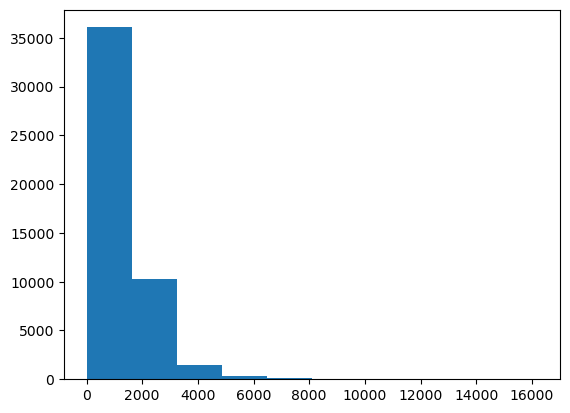

In [42]:
plt.hist(cds_length)

We can change the number of bins to inspect the distriution in more details. 

(array([4.700e+02, 2.873e+03, 3.989e+03, 4.413e+03, 4.563e+03, 4.635e+03,
        4.613e+03, 4.009e+03, 3.548e+03, 2.961e+03, 2.108e+03, 1.736e+03,
        1.427e+03, 1.174e+03, 9.760e+02, 8.030e+02, 6.220e+02, 5.440e+02,
        4.780e+02, 4.000e+02, 2.960e+02, 2.620e+02, 2.080e+02, 1.390e+02,
        1.310e+02, 1.320e+02, 8.100e+01, 8.700e+01, 4.900e+01, 3.900e+01,
        4.500e+01, 4.800e+01, 4.500e+01, 4.900e+01, 3.200e+01, 3.700e+01,
        2.500e+01, 2.700e+01, 1.000e+01, 3.200e+01, 2.700e+01, 1.000e+01,
        3.000e+00, 6.000e+00, 8.000e+00, 8.000e+00, 6.000e+00, 3.000e+00,
        8.000e+00, 4.000e+00, 1.000e+01, 1.000e+00, 0.000e+00, 2.000e+00,
        5.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 7.000e+00,
        7.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+0

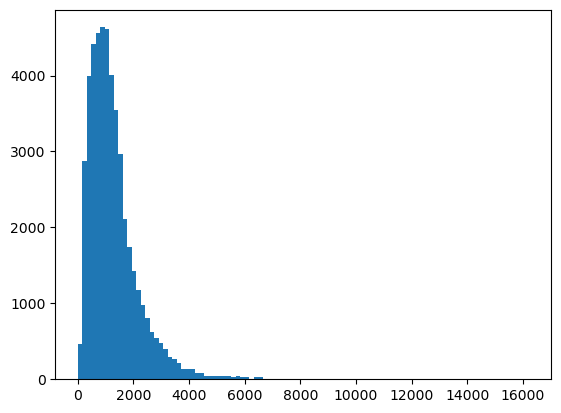

In [47]:
plt.hist(cds_length, bins=100)

### Exercise  V

* now let's make a list that stores the length of all CDS in order (sic!).


### Let's translate all the sequences and store them as protein sequences

We will use the [Seq](https://biopython.org/wiki/Seq) and [SeqRecord](https://biopython.org/wiki/SeqRecord) objects as a container to store these protein sequences.

...it's like a protein sequence dog...

In [ ]:
third_cds.seq

Because we know that the third_cds sequence is a DNA sequence we know we can translate it.

In [ ]:
####translate
third_cds.seq.translate()

In [ ]:
###let's make a protein record for the third cds
third_protein = SeqRecord.SeqRecord(seq=third_cds.seq.translate())

In [ ]:
print(third_protein)

In [ ]:
third_protein.id = third_cds.id
third_protein.name = third_cds.name
third_protein.description = third_cds.description

In [ ]:
print(third_protein)

### Let's see if there is a correlation between 

Some people find python plotting a bit awkward and it is still good to know the basics.

The basic python plotting is [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). More advanced for interactive figures and such is [Altair](https://altair-viz.github.io/) which is up and coming.

For now some starting plots in matplotlib

In [22]:
?plt.scatter

In [ ]:
plt.scatter(protein_length, cds_length)

In [ ]:
plt.scatter(protein_length, cds_length)
plt.ylabel('CDS Length [bp]')
plt.xlabel('Protein Length [aa]')

### Let's caclulate the [Isoelectric Point](https://en.wikipedia.org/wiki/Isoelectric_point) for all proteins 

The isoelectric point is the pH at which a peptide sequence has no charge.

We will makes use of the [SeqUtils](https://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html) using a specific dog idea (aka Class) called [IsoelectricPoint](https://biopython.org/DIST/docs/api/Bio.SeqUtils.IsoelectricPoint.IsoelectricPoint-class.html) to make these computations easier.

In [ ]:
from Bio.SeqUtils import IsoelectricPoint as IP

In [ ]:
?IP

In [ ]:
#### third_protein
third_protein.seq

In [ ]:
protein = IP.IsoelectricPoint(third_protein.seq)

...it's like a sequnce dog...

In [ ]:
###calculate the pi
protein.pi()

In [ ]:
####calculate the charge at a certain 
protein.charge_at_pH(10)

### Exercise VII

* Let's make a list of all the pi values of all proteins.
* Plot the pi distribution of all proteins in Arabidopsis.
* Explain the observed distribution

In [ ]:
#### Faded example
protein_pi_values = []
for protein in arabidopsis_proteins:
    tmp_protein = IP.IsoelectricPoint(protein.seq)
    tmp_protein_pi = tmp_protein.pi()
    protein_pi_values.append(tmp_protein_pi)

In [ ]:
#### Plot the distribution of pi values of all arabidopsis proteins
plt.hist(protein_pi_values, bins = 100)
plt.xlabel('pi [pH]')

### Exercise VIII

* look at the relationship between protein length and pI values



In [ ]:
plt.scatter(protein_length, protein_pi_values, alpha=0.2)

The problem here is that too many points are overlapping and we would need to do some summary statistics while plotting.

### Seaborn to the rescue!

Let's do some density plots looking at both [distributions](https://seaborn.pydata.org/tutorial/distributions.html) at once.

In [23]:
import seaborn as sns

In [ ]:
sns.kdeplot(protein_length, protein_pi_values)

In [ ]:
sns.jointplot(protein_length, protein_pi_values, kind='hex', color = 'g')

In [ ]:

from IPython.display import Image